🌳 Árbol de Merkle (Merkle Tree)

Un árbol de Merkle es una estructura de datos en forma de árbol que parte de un conjunto de registros, representados por sus hashes en las hojas. Estos hashes se agrupan para formar nodos intermedios, hasta llegar a un nodo raíz. Esta estructura se crea así para permitir posteriormente verificar la integridad y pertenencia de los registros al conjunto.

Se implementa comúnmente como un árbol binario (aunque no siempre) en diferentes librerías y es utilizado en sistemas distribuidos como blockchain e IPFS.

🏁 Propósito y ejemplo

El propósito depende del sistema que lo implemente, asi que vamos a verlo en el ejemplo mas común, que es en la blockchain de bitcoin.

En este ejemplo, se parte de la premisa de una red de nodos "trustless" (sin necesidad de confiar), donde el tercero necesita demostrar que un valor dado está en un registro mayor, realizando la denominada Merkle proof.

Por lo tanto, vemos que existen dos etapas:

* La creación del árbol que se llama Merkleization o Merkle tree construction

* La prueba de verificación que se llama Merkle proof.

Veámoslo en el ejemplo para aclarar lo explicado.

> 🎓 El ejemplo intenta ser lo más abstracto posible y siempre con el propósito de explicar sin introducir nuevos conceptos, 🤔 espero que así sea y no generar más confusión...

Supongamos que tenemos un nodo que se encarga de guardar el conjunto de registros ["a", "b", "c" y "d"].

Este nodo genera el árbol de Merkle, es decir, se encarga de "merkelizar" ese conjunto para el proceso de verificación posterior, para los posibles clientes o nodos que requieran la evidencia en la Merkle proof.

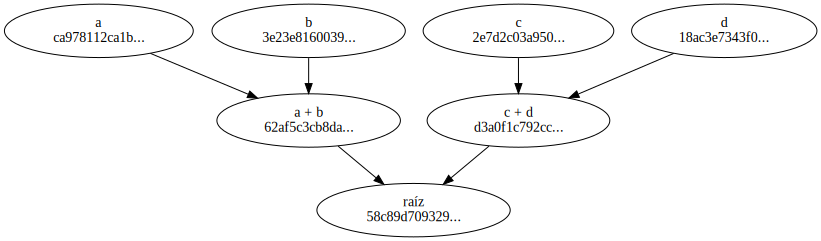

In [3]:
# Probar ejemplo:
from src.merkle_playground import *

# Datos de entrada
leaves = ['a', 'b', 'c', 'd']
levels = build_merkle_tree(leaves)
draw_merkle_tree(levels, leaves)


Al generar el árbol, los registros se pueden representar como nodos, denominados nodos hoja, donde en lugar del valor se calcula su hash.

> ¿Por qué el hash? Reduce el tamaño y lo hace fijo siendo más fácil de guardar; y sobre todo protege privacidad y asegura integridad.

En el proceso de merklización o hashing recursivo, los hash de "a" y "b" se combinan dando como resultado un nuevo hash "62af5c3cb8da...", que representamos como los denominados nodos intermedios.

En este ejemplo, como sería en blockchain, siempre se hace entre pares y en el orden en el que llega a formarse el registro, es decir, entre "a" y "b", y entre "c" y "d".

> Depende del diseño que sea entre pares, por ejemplo, en IPFS es n-arios, es decir, puede tener varios hijos.

Hacemos lo mismo con los nodos "a + b" y "c + d" para generar el nodo raíz.

---

Supongamos que un tercero, como puede ser un cliente, tiene que validar si el registro "a" se encuentra dentro del conjunto de registros y solamente conoce el dato del hash raíz "58c89d709329..." debido a que almacenar todos los registros sería inviable (pensando que no son 4 como el ejemplo, sino miles).

> 🤔 Es verdad que nos falta contexto, nos podemos preguntar ¿por qué tiene el hash raíz? ¿qué cliente?... Todo eso lo podemos ver en las [SPV Wallets](https://academy.bit2me.com/que-son-las-spv-wallets/), en cualquier caso, este ejemplo sólo quiere mostrar una primera introducción.

En el proceso de Merkle proof, siguiendo la premisa trustless, un cliente en lugar de preguntar al nodo `¿existe el registro "a"?`, le dice, `dame la evidencias para que yo pueda validar que existe el registro "a"`.

> 💡 Tenemos que entender que esto se produce en el contexto de una red descentralizada de nodos trustless, sin necesidad de confiar en el tercero, podría ser un nodo malintencionado, por eso necesita la evidencia.

Por lo tanto, el nodo que tiene el árbol de Merkle, proporciona la ruta de validación, es decir, los nodos hermanos necesarios hasta llegar al nodo raíz.

Veámoslo usando código...

> Es una simplificación, se hacen operaciones binarias y por su puesto todo es mucho más complejo.

In [ ]:
import hashlib

def crearHash(data):
    return hashlib.sha256(data.encode()).hexdigest()

# Inicialmente, un nodo crea el árbol de Merkle y este sería el proceso "Merkleization"
hash_de_a = crearHash("a")
hash_de_b = crearHash("b")
hash_de_c = crearHash("c")
hash_de_d = crearHash("d")

nodos_hoja = [hash_de_a, hash_de_b, hash_de_c, hash_de_d]

hash_uniendo_ab = crearHash(nodos_hoja[0] + nodos_hoja[1])
hash_uniendo_cd = crearHash(nodos_hoja[2] + nodos_hoja[3])

nodos_intermedios = [hash_uniendo_ab, hash_uniendo_cd]

raiz = crearHash(nodos_intermedios[0] + nodos_intermedios[1])

# El cliente, en el proceso de Merkle proof, quiere probar que el valor "a" es un registro válido.
valor_probado_cliente = "a"
# Además, el cliente ya conoce previamente el hash raíz de todos los registros
raiz_cliente = "58c89d709329eb37285837b042ab6ff72c7c8f74de0446b091b6a0131c102cfd"

# El proceso de Merkle proof consiste en recrear el hipotético hash raíz
# Lo puede recrear gracias a que el nodo se lo proporciona, siendo estas las evidencias que necesita

# Inicialmente el cliente crea el hash
hash_valor_probado = crearHash(valor_probado_cliente)

# Ahora necesita crear el hipotético nodo intermedio "a + b", para eso necesita el nodo hermano de "a"
# Ese nodo hermano, se lo proporciona el propio nodo al cliente
nodo_hermano_del_hash_solicitado = hash_de_b

# Ahora el cliente recrear el hipotético nodo intermedio "a + b".
recrear_nodo_intermedio = crearHash( hash_valor_probado + nodo_hermano_del_hash_solicitado)

# Ahora necesita crear el hipotético nodo raíz, para eso necesita el nodo hermano del nodo intermedio ha generado
# Ese nodo intermedio hermano, se lo proporciona el propio nodo al cliente
nodo_hermano_intermedio_solicitado = hash_uniendo_cd

# Ahora el cliente puede recrear el hash raíz completo
recrear_nodo_raiz = crearHash( recrear_nodo_intermedio + nodo_hermano_intermedio_solicitado)

print("Raíz original que conoce el ciente: ", raiz_cliente)
print("Raíz calculada:", recrear_nodo_raiz)

print("¿'a' está en el árbol?", recrear_nodo_raiz == raiz_cliente)



Raíz original que conoce el ciente:  58c89d709329eb37285837b042ab6ff72c7c8f74de0446b091b6a0131c102cfd
Raíz calculada: 58c89d709329eb37285837b042ab6ff72c7c8f74de0446b091b6a0131c102cfd
¿'a' está en el árbol? True


Como vemos en el proceso de validación:

* El nodo no le dice al cliente simplemente si es válido o no el registro "a", debe proporcionar la información necesaria para que el cliente pueda recrear el hash raíz y así validar que es correcto.
* El proceso de Merkle proof no solo valida la inclusión de un dato, sino que al reconstruir el camino hasta la raíz, también se valida la integridad del conjunto entero de registros.

---

Hemos visto un ejemplo simple sobre un árbol de Merkle y sobre todo para qué se usa en un ejemplo y así entenderlo..

Un árbol de Merkle más grande se vería así, es decir, con más niveles, porque se combinan los nodos intermedios en parejas

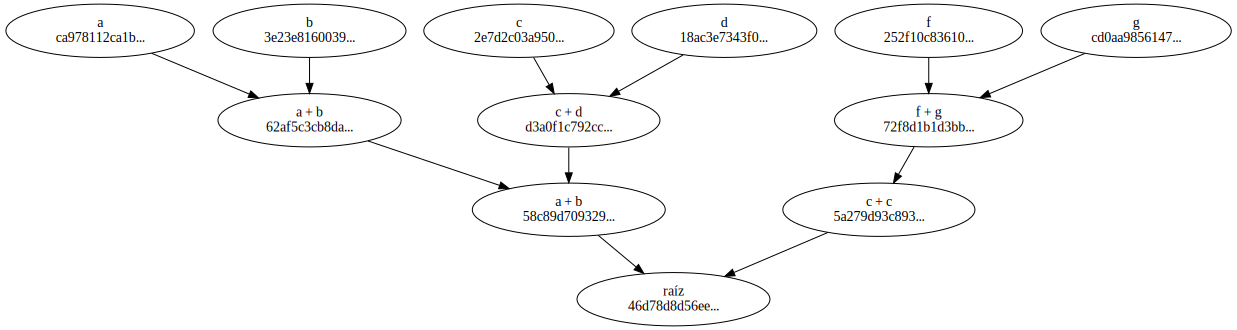

In [2]:
# Probar ejemplo:
from src.merkle_playground import *

# Datos de entrada
leaves = ['a', 'b', 'c', 'd', 'f', 'g']
levels = build_merkle_tree(leaves)
draw_merkle_tree(levels, leaves)

✅ Aclaración:

En ciencias de computación, todo árbol, como el árbol de Merkle, es un tipo de DAG (un grafo acíclico dirigido) siguiendo una estructura jerárquica.

> Puedes probarlo en [jugando con un DAG](./dag_playground.ipynb).